In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
airline=pd.read_csv("EastWestAirlines 1.csv")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airline.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll',
        'Award?']
airlines=airline[columns]

In [7]:
input=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll']
output=['Award?']
x=airlines[input]
y=airlines[output]

# DENDROGRAM

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

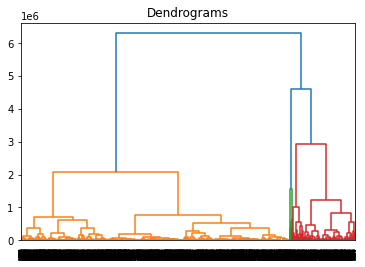

In [9]:
plt.title("Dendrograms")
dendrogram = sch.dendrogram(sch.linkage(airlines, method='ward'))

In [11]:
#Clustering
from sklearn.cluster import AgglomerativeClustering

In [12]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc.fit(x)
hc.fit_predict(x)

array([2, 2, 2, ..., 4, 4, 2], dtype=int64)

In [13]:
#Predict
y_predict=hc.fit_predict(airlines[['Award?']])
y_predict

array([0, 0, 0, ..., 3, 0, 2], dtype=int64)

In [14]:
#Accuracy
import sklearn.metrics as sm
sm.accuracy_score(y_predict,hc.fit_predict(x))

0.07701925481370342

Accuracy is 77% approx.

# KMeans

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [16]:
airline=pd.read_csv("EastWestAirlines 1.csv")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline.iloc[:,1:11])

In [18]:
from sklearn.cluster import KMeans

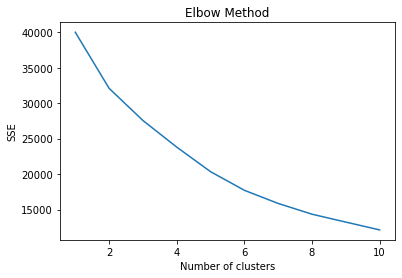

In [19]:
K_rng= range(1,11)
sse=[]
for K in K_rng:
    km=KMeans(n_clusters=K,random_state=0)
    km.fit(scaled_airline_df)
    sse.append(km.inertia_)   
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [20]:
km=KMeans(n_clusters=5)
km
km.fit(x)
km.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [21]:
y_predict=km.fit_predict(airline[['Award?']])
y_predict

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


array([1, 1, 1, ..., 0, 1, 1])

# DBscan

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [23]:
airline=pd.read_csv("EastWestAirlines 1.csv")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [24]:
airline.drop(['ID#'],axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline_df = scaler.fit_transform(airline.iloc[:,1:11])

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
model=DBSCAN(eps=0.20,min_samples=15)
model.fit(x)

DBSCAN(eps=0.2, min_samples=15)

In [28]:
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [29]:
cl=pd.DataFrame(model.labels_,columns=['cluster'])
cl.head()

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1


In [30]:
pd.concat([airlines,cl],axis=1).head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
